In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_centers = 8
centers = np.random.uniform(-9, 9, (n_centers, 2))
v_centers = np.random.uniform(-1, 1, (n_centers, 2))
v_centers = 3.0*v_centers/np.linalg.norm(np.ravel(v_centers))

n_points = 200
points = np.random.uniform(-10, 10, (n_points, 2))

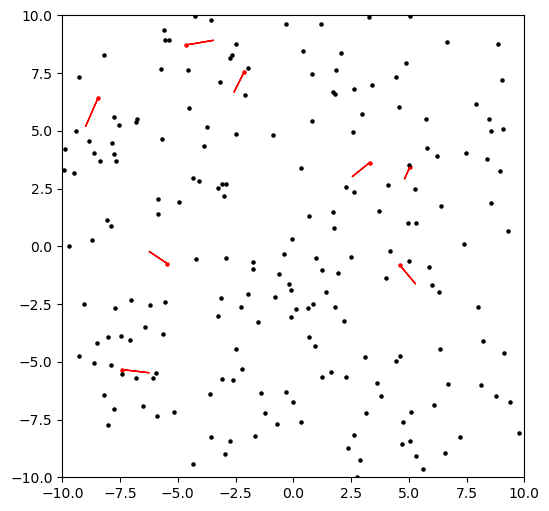

In [3]:
plt.rcParams["figure.figsize"] = (6,6)

ax=plt.gca()

plt.scatter(centers[:,0], centers[:,1], s=5, c='r')
plt.scatter(points[:,0], points[:,1], s=5, c='k')

for ii in range(n_centers):
    plt.arrow(centers[ii,0], centers[ii,1], v_centers[ii,0], v_centers[ii,1], color='r')

plt.axis('scaled')
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()

In [4]:
from scipy.spatial import Voronoi, voronoi_plot_2d

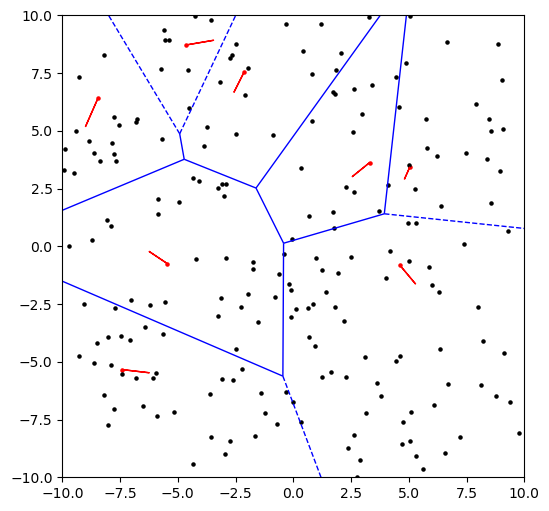

In [5]:
vor = Voronoi(centers, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='b', s=4)

ax=plt.gca()

plt.scatter(centers[:,0], centers[:,1], s=5, c='r')
plt.scatter(points[:,0], points[:,1], s=5, c='k')

for ii in range(n_centers):
    plt.arrow(centers[ii,0], centers[ii,1], v_centers[ii,0], v_centers[ii,1], color='r')

plt.axis('scaled')
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()

In [6]:
neighbors_points = []

aux_dict = {jj:ii for ii,jj in enumerate(vor.point_region)}

for kk in range(vor.npoints):

    region = vor.point_region[kk]
    vertices = vor.regions[region].copy()
    if -1 in vertices:
        vertices.remove(-1)

    neighbors=[]
    for ii in range(len(vor.regions)):
        if len(np.intersect1d(vertices, vor.regions[ii])):
            if ii!= region:
                neighbors.append(aux_dict[ii])
    
    neighbors_points.append(neighbors)

In [8]:
from scipy.spatial.distance import euclidean

In [17]:
v_points = np.zeros((n_points, 2), dtype=float)

In [21]:
exponent=2

In [22]:
for ii in range(n_points):
    
    threshold=np.infty
    closest_center = None
    
    for jj in range(vor.npoints):
        dd = euclidean(points[ii], vor.points[jj])
        if threshold>dd:
            threshold=dd
            closest_center = jj
    
    influencers = [closest_center] + neighbors_points[closest_center]
    
    factors = []
    
    for jj in influencers:
        factors.append(1.0/euclidean(points[ii], vor.points[jj])**exponent)
    
    factors = factors/np.linalg.norm(factors)
    
    for kk, jj in enumerate(influencers):
        v_points[ii]+=factors[kk]*v_centers[jj]

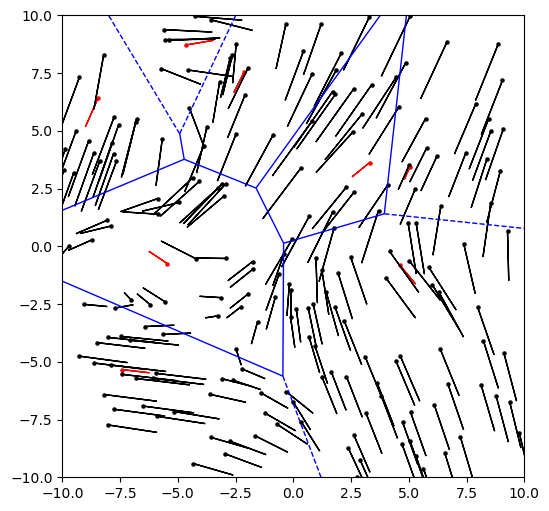

In [23]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='b', s=4)

ax=plt.gca()

plt.scatter(centers[:,0], centers[:,1], s=5, c='r')
plt.scatter(points[:,0], points[:,1], s=5, c='k')

for ii in range(n_centers):
    plt.arrow(centers[ii,0], centers[ii,1], v_centers[ii,0], v_centers[ii,1], color='r')

for ii in range(n_points):
    plt.arrow(points[ii,0], points[ii,1], v_points[ii,0], v_points[ii,1], color='k')
    
plt.axis('scaled')
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.show()